In [1]:
# Local Grocery Shop Sales Analysis
# Author: Your Name
# Role: Retail Data Analyst – Self-Initiated Project
# Date: July 2023 – Dec 2023

#1 Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter

sns.set(style="whitegrid")
plt.rcParams['figure.figsize']=(10,5)

In [2]:
from datetime import datetime, timedelta
import random
import pandas as pd

items = [
    {"Item": "Toor Dal", "CP": 80, "SP": 95, "Supplier": "AgriMart"},
    {"Item": "Sunflower Oil", "CP": 110, "SP": 125, "Supplier": "PureOil Co"},
    {"Item": "Parle-G", "CP": 4, "SP": 5, "Supplier": "Parle"},
    {"Item": "Dettol Soap", "CP": 27, "SP": 32, "Supplier": "HUL"},
    {"Item": "Aashirvaad Atta", "CP": 180, "SP": 210, "Supplier": "ITC"},
    {"Item": "Maggi", "CP": 10, "SP": 12, "Supplier": "Nestle"},
    {"Item": "Good Day", "CP": 15, "SP": 18, "Supplier": "Britannia"},
    {"Item": "Tata Salt", "CP": 17, "SP": 20, "Supplier": "Tata"},
    {"Item": "Colgate Paste", "CP": 45, "SP": 55, "Supplier": "Colgate"},
    {"Item": "Rin Detergent", "CP": 35, "SP": 42, "Supplier": "HUL"},
]

start_date = datetime(2023, 7, 1)
data = []
bill_id = 1000

for day in range(184):  # July 1 to Dec 31
    date = start_date + timedelta(days=day)
    num_bills = random.randint(5, 15)
    for _ in range(num_bills):
        bill_id += 1
        num_items_in_bill = random.randint(1, 4)
        items_in_bill = random.sample(items, num_items_in_bill)
        for item in items_in_bill:
            quantity = random.randint(1, 5)
            hour = random.randint(9, 21)
            minute = random.choice([0, 15, 30, 45])
            data.append({
                "Date": date.strftime("%Y-%m-%d"),
                "Time": f"{hour:02}:{minute:02}",
                "Item": item["Item"],
                "Quantity": quantity,
                "SP": item["SP"],
                "CP": item["CP"],
                "Supplier": item["Supplier"],
                "Bill_ID": bill_id
            })

df_raw = pd.DataFrame(data)
df_raw.to_csv("Local_Grocery_data.csv", index=False)


In [3]:
#3 LOAD,CLEAN & TRANSFORM DATA

df = pd.read_csv("Local_Grocery_data.csv", parse_dates=["Date"])

# Initial data examination
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())
print("\nData types and missing values:")
display(df.info())
print("\nDescriptive statistics:")
display(df.describe(include='all'))


Dataset shape: (4657, 8)

First 5 rows:


,Date,Time,Item,Quantity,SP,CP,Supplier,Bill_ID
0,2023-07-01,21:30,Aashirvaad Atta,4,210,180,ITC,1001
1,2023-07-01,13:45,Maggi,5,12,10,Nestle,1002
2,2023-07-01,12:30,Aashirvaad Atta,3,210,180,ITC,1003
3,2023-07-01,15:00,Parle-G,3,5,4,Parle,1003
4,2023-07-01,10:45,Maggi,5,12,10,Nestle,1003



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4657 entries, 0 to 4656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4657 non-null   datetime64[ns]
 1   Time      4657 non-null   object        
 2   Item      4657 non-null   object        
 3   Quantity  4657 non-null   int64         
 4   SP        4657 non-null   int64         
 5   CP        4657 non-null   int64         
 6   Supplier  4657 non-null   object        
 7   Bill_ID   4657 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 291.2+ KB


None


Descriptive statistics:


,Date,Time,Item,Quantity,SP,CP,Supplier,Bill_ID
count,4657,4657,4657,4657.000000,4657.000000,4657.000000,4657,4657.000000
unique,NaN,52,10,NaN,NaN,NaN,9,NaN
top,NaN,14:30,Maggi,NaN,NaN,NaN,HUL,NaN
freq,NaN,112,510,NaN,NaN,NaN,937,NaN
mean,2023-09-30 03:52:13.089972224,NaN,NaN,3.021044,60.500322,51.517930,NaN,1929.332618
min,2023-07-01 00:00:00,NaN,NaN,1.000000,5.000000,4.000000,NaN,1001.000000
25%,2023-08-16 00:00:00,NaN,NaN,2.000000,18.000000,15.000000,NaN,1472.000000
50%,2023-09-29 00:00:00,NaN,NaN,3.000000,32.000000,27.000000,NaN,1935.000000
75%,2023-11-14 00:00:00,NaN,NaN,4.000000,95.000000,80.000000,NaN,2382.000000
max,2023-12-31 00:00:00,NaN,NaN,5.000000,210.000000,180.000000,NaN,2850.000000


In [4]:
df.drop_duplicates(inplace=True)
df.dropna(subset=["Date", "Time", "Item", "Quantity", "SP", "CP", "Supplier"], inplace=True)
df.reset_index(drop=True, inplace=True)

df["Quantity"] = pd.to_numeric(df["Quantity"], errors="coerce").fillna(0).astype(int)
df["SP"] = pd.to_numeric(df["SP"], errors="coerce")
df["CP"] = pd.to_numeric(df["CP"], errors="coerce")

df["Time"] = pd.to_datetime(df["Time"], format="%H:%M", errors="coerce")
df.dropna(subset=["Time"], inplace=True)

df["Hour"] = df["Time"].dt.hour
df["Month"] = df["Date"].dt.to_period("M")
df["Total_Sale"] = df["Quantity"] * df["SP"]
df["Total_Cost"] = df["Quantity"] * df["CP"]
df["Profit"] = df["Total_Sale"] - df["Total_Cost"]
df["Profit_Margin_%"] = df.apply(
    lambda row: (row["Profit"] / row["Total_Sale"]) * 100 if row["Total_Sale"] > 0 else 0, axis=1
)

df = df[(df["Quantity"] > 0) & (df["SP"] > 0) & (df["CP"] > 0)]
df = df[df["Profit_Margin_%"] <= 100]
df = df[df["SP"] >= df["CP"]]

In [5]:
# 4. DATA VALIDATION

assert (df["Quantity"] > 0).all()
assert (df["SP"] > 0).all()
assert (df["CP"] > 0).all()
assert (df["Profit"].min() >= -1e-2)


In [6]:
# 5. EXPLORATORY DATA ANALYSIS

print("Unique Items:", df["Item"].nunique())
print("Date Range:", df["Date"].min(), "to", df["Date"].max())
print("Missing Values:\n", df.isnull().sum())
print("\nSummary:\n", df.describe())


Unique Items: 10
Date Range: 2023-07-01 00:00:00 to 2023-12-31 00:00:00
Missing Values:
 Date               0
Time               0
Item               0
Quantity           0
SP                 0
CP                 0
Supplier           0
Bill_ID            0
Hour               0
Month              0
Total_Sale         0
Total_Cost         0
Profit             0
Profit_Margin_%    0
dtype: int64

Summary:
                                 Date                           Time  \
count                           4657                           4657   
mean   2023-09-30 03:52:13.089972224  1900-01-01 15:23:21.116598784   
min              2023-07-01 00:00:00            1900-01-01 09:00:00   
25%              2023-08-16 00:00:00            1900-01-01 12:15:00   
50%              2023-09-29 00:00:00            1900-01-01 15:15:00   
75%              2023-11-14 00:00:00            1900-01-01 18:30:00   
max              2023-12-31 00:00:00            1900-01-01 21:45:00   
std                      

In [7]:
# 6. BUSINESS INSIGHTS

top_items = df.groupby("Item")["Quantity"].sum().sort_values(ascending=False)
slow_items = df.groupby("Item")["Quantity"].sum().sort_values().head(5)
monthly_sales = df.groupby("Month")["Total_Sale"].sum()
profit_items = df.groupby("Item")["Profit"].sum().sort_values(ascending=False)
hourly_sales = df.groupby("Hour")["Total_Sale"].sum()
supplier_perf = df.groupby("Supplier")[["Quantity", "Total_Cost"]].sum()

# Frequent Item Combinations
combo_df = df.groupby("Bill_ID")["Item"].apply(list)
combos = Counter()
for items in combo_df:
    unique_items = sorted(set(items))
    for combo in combinations(unique_items, 2):
        combos[combo] += 1
top_combos = combos.most_common(5)


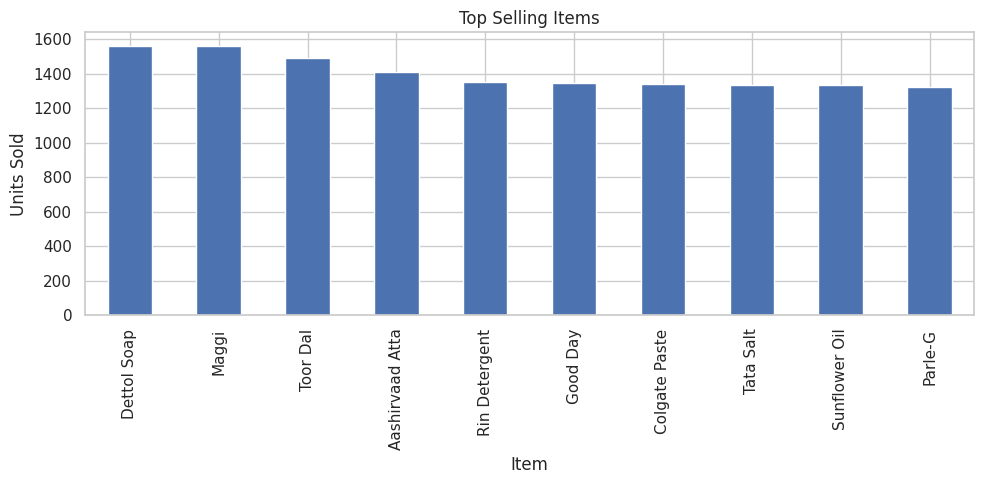

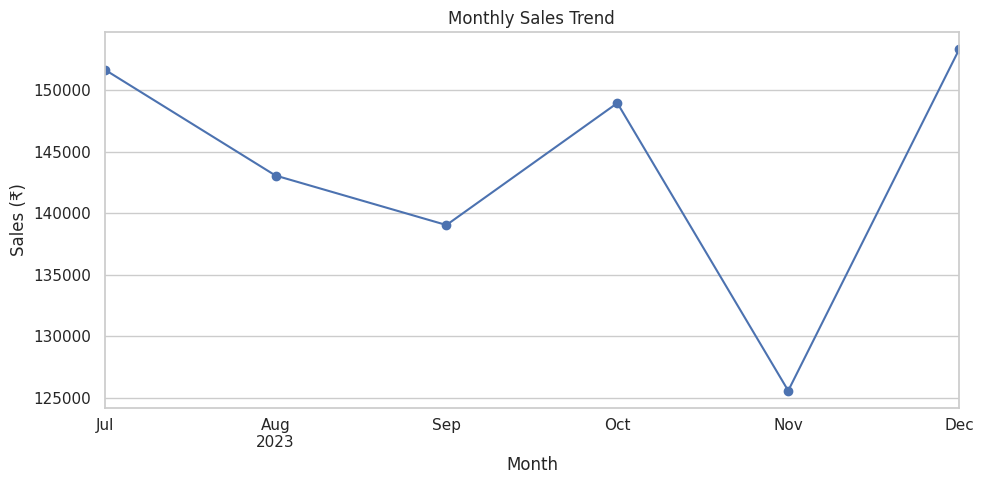

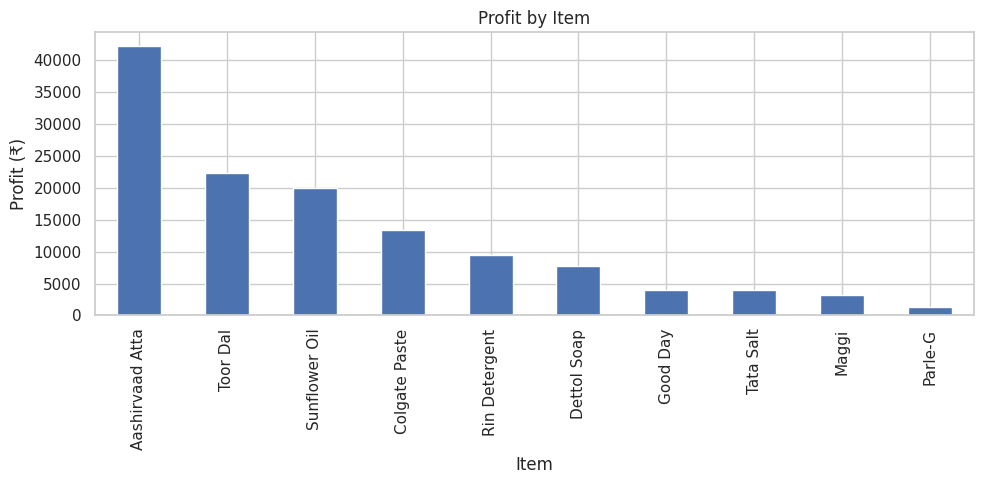

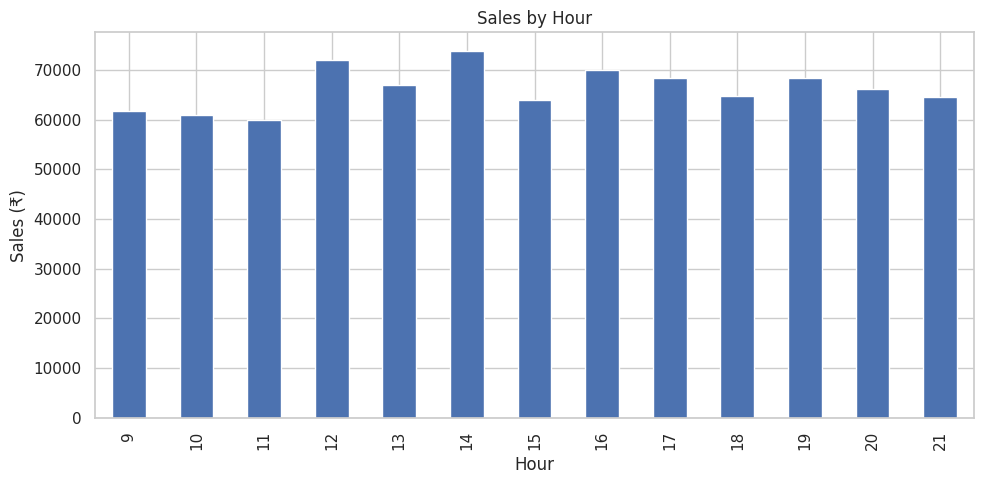

In [8]:
# 7. VISUALIZATION

# Top Selling Items
top_items.plot(kind="bar", title="Top Selling Items")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.savefig("top_selling_items.png")
plt.show()

# Monthly Sales Trend
monthly_sales.plot(marker="o", title="Monthly Sales Trend")
plt.ylabel("Sales (₹)")
plt.tight_layout()
plt.savefig("monthly_sales_trend.png")
plt.show()

# Profit by Item
profit_items.plot(kind="bar", title="Profit by Item")
plt.ylabel("Profit (₹)")
plt.tight_layout()
plt.savefig("profit_by_item.png")
plt.show()

# Hourly Sales
hourly_sales.plot(kind="bar", title="Sales by Hour")
plt.ylabel("Sales (₹)")
plt.tight_layout()
plt.savefig("sales_by_hour.png")
plt.show()


In [9]:
# 8. CONCLUSION & OUTPUT
# ---------------------------------------------
print("\nTop 5 Selling Items:\n", top_items.head())
print("\nSlowest 5 Selling Items:\n", slow_items)
print("\nMost Profitable Items:\n", profit_items.head())
print("\nPeak Sales Hours:\n", hourly_sales.sort_values(ascending=False).head())
print("\nTop Supplier by Quantity:\n", supplier_perf.sort_values(by="Quantity", ascending=False).head())

print("\nMost Frequent Item Combinations:")
for combo, count in top_combos:
    print(f"{combo}: {count} times")



Top 5 Selling Items:
 Item
Dettol Soap        1563
Maggi              1562
Toor Dal           1490
Aashirvaad Atta    1410
Rin Detergent      1355
Name: Quantity, dtype: int64

Slowest 5 Selling Items:
 Item
Parle-G          1326
Sunflower Oil    1335
Tata Salt        1338
Colgate Paste    1341
Good Day         1349
Name: Quantity, dtype: int64

Most Profitable Items:
 Item
Aashirvaad Atta    42300
Toor Dal           22350
Sunflower Oil      20025
Colgate Paste      13410
Rin Detergent       9485
Name: Profit, dtype: int64

Peak Sales Hours:
 Hour
14    73850
12    72060
16    69912
17    68458
19    68388
Name: Total_Sale, dtype: int64

Top Supplier by Quantity:
            Quantity  Total_Cost
Supplier                       
HUL            2918       89626
Nestle         1562       15620
AgriMart       1490      119200
ITC            1410      253800
Britannia      1349       20235

Most Frequent Item Combinations:
('Dettol Soap', 'Toor Dal'): 129 times
('Dettol Soap', 'Maggi'): 126